In [1]:
using LinearAlgebra
using Arpack
using Plots

In [2]:
n = 5
iter = 20
x = rand(n, 1)

5×1 Matrix{Float64}:
 0.8434432682072673
 0.6340318727776325
 0.013116923377485379
 0.27962957079850437
 0.824480604429868

In [3]:
A =[
    0.2615    0.3692    0.0154    0.1231    0.2308;
    0.3538    0.0769    0.1077    0.2154    0.2462;
    0.0615    0.0923    0.2000    0.3077    0.3385;
    0.1538    0.1846    0.2923    0.3231    0.0462;
    0.1692    0.2769    0.3846    0.0308    0.1385
]

5×5 Matrix{Float64}:
 0.2615  0.3692  0.0154  0.1231  0.2308
 0.3538  0.0769  0.1077  0.2154  0.2462
 0.0615  0.0923  0.2     0.3077  0.3385
 0.1538  0.1846  0.2923  0.3231  0.0462
 0.1692  0.2769  0.3846  0.0308  0.1385

In [4]:
for i in 1:iter
    x = A*x
end

In [5]:
x

5×1 Matrix{Float64}:
 0.5189153334874308
 0.5189153334226303
 0.5189153332916967
 0.5189153333754618
 0.5189153334332267

In [6]:
A*x

5×1 Matrix{Float64}:
 0.5189153334341984
 0.518915333423904
 0.5189153333895019
 0.5189153333795742
 0.5189153333832524

In [7]:
a, b = eigs(A)
a

┌ Warning: Adjusting nev from 6 to 3
└ @ Arpack /home/leila/.julia/packages/Arpack/pLziT/src/Arpack.jl:92


3-element Vector{ComplexF64}:
                  1.0 + 0.0im
 -0.32732159246273773 + 0.0im
   0.3273215924627376 + 0.0im

In [8]:
b

5×3 Matrix{ComplexF64}:
 0.447214+0.0im  0.0976218+0.0im    0.678073+0.0im
 0.447214+0.0im   0.352626+0.0im    0.322336+0.0im
 0.447214+0.0im   0.550129+0.0im   -0.550029+0.0im
 0.447214+0.0im  -0.322236+0.0im   -0.352526+0.0im
 0.447214+0.0im  -0.677973+0.0im  -0.0975221+0.0im

In [13]:
function poweriter(A, numiter)
"""
Power iteration for the dominant eigenvalue.

Input:
    A           square matrix
    numiter     #iteration
Output:
    γ           vector of the dominant eigenvalue approximations
    x           final eigenvector approximation
"""
    n = size(A, 1)
    x = normalize(randn(n), Inf)
    γ = zeros(numiter)
    for k in 1:numiter
        y = A*x
        m = argmax(abs.(y))
        γ[k] = y[m] / x[m]
        x = y / y[m]
    end
    return γ, x
end

poweriter (generic function with 1 method)

In [14]:
γ, v = poweriter(B, 10);
c, ~ = eigs(B)
c[1] , γ[end]

┌ Warning: Adjusting nev from 6 to 3
└ @ Arpack /home/leila/.julia/packages/Arpack/pLziT/src/Arpack.jl:92


(2.21526417157825 + 0.0im, 2.215433938982214)

In [15]:
# Convergence
λ = [1, -.75, .6, -.4, 0]
A = UpperTriangular(ones(5,5)) + diagm(λ .- 1)

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

In [31]:
iter = 40
γ, x = poweriter(A, iter);
λ1 = γ[end]

1.0000045365050145

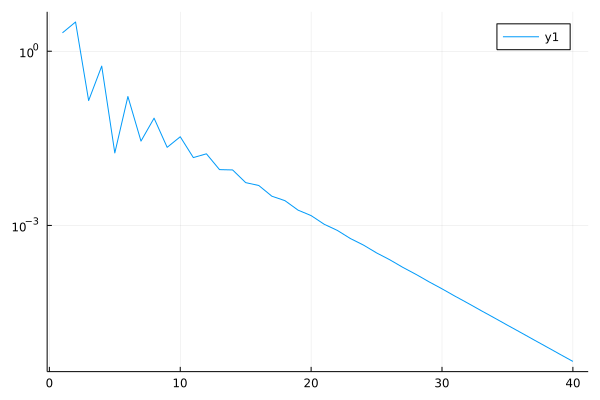

In [32]:
err = 1 .- γ # λ1 .- γ;
plot(1:iter, abs.(err), yaxis=:log)

In [33]:
# This is how power iteration should converge asymptotically
λ[2] / λ[1] , err[40] / err[39]

(-0.75, -0.7505952274161848)